### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df_combined = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

display(df_combined.head())

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [ ]:
import pandas as pd


In [ ]:
faturamento_por_loja = df_combined.groupby('Loja')['Preço'].sum().reset_index()

In [ ]:
# Exibe o resultado
print(faturamento_por_loja)

     Loja       Preço
0  Loja 1  1534509.12
1  Loja 2  1488459.06
2  Loja 3  1464025.03
3  Loja 4  1384497.58


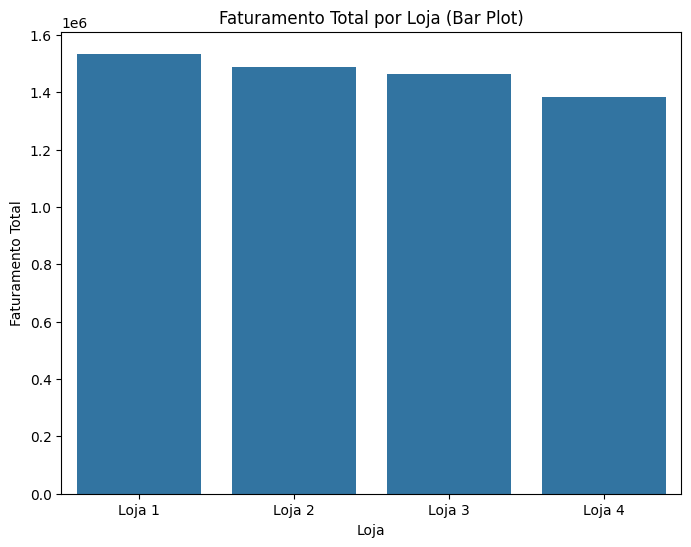

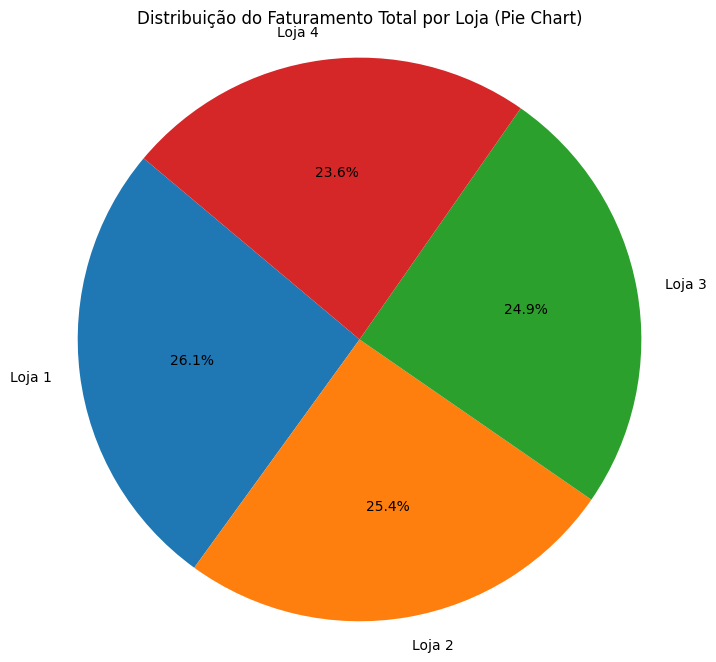

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Loja', y='Preço', data=faturamento_por_loja)
plt.title('Faturamento Total por Loja (Bar Plot)')
plt.xlabel('Loja')
plt.ylabel('Faturamento Total')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(faturamento_por_loja['Preço'], labels=faturamento_por_loja['Loja'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Faturamento Total por Loja (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 2. Vendas por Categoria


In [ ]:


#Quantidade de produtos vendidos por categoria em cada loja
quantidade_por_categoria = (
    df_combined
    .groupby(['Loja', 'Categoria do Produto'])
    .size()
    .reset_index(name='Quantidade Vendida')
)

print("Quantidade de produtos vendidos por categoria em cada loja:")
print(quantidade_por_categoria)

mais_popular_por_loja = quantidade_por_categoria.loc[
    quantidade_por_categoria.groupby('Loja')['Quantidade Vendida'].idxmax()
]


Quantidade de produtos vendidos por categoria em cada loja:
      Loja   Categoria do Produto  Quantidade Vendida
0   Loja 1             brinquedos                 324
1   Loja 1       eletrodomesticos                 312
2   Loja 1            eletronicos                 448
3   Loja 1        esporte e lazer                 284
4   Loja 1  instrumentos musicais                 182
5   Loja 1                 livros                 173
6   Loja 1                 moveis                 465
7   Loja 1  utilidades domesticas                 171
8   Loja 2             brinquedos                 313
9   Loja 2       eletrodomesticos                 305
10  Loja 2            eletronicos                 422
11  Loja 2        esporte e lazer                 275
12  Loja 2  instrumentos musicais                 224
13  Loja 2                 livros                 197
14  Loja 2                 moveis                 442
15  Loja 2  utilidades domesticas                 181
16  Loja 3            

In [ ]:
print("\nCategoria mais popular de cada loja:")
print(mais_popular_por_loja)


Categoria mais popular de cada loja:
      Loja Categoria do Produto  Quantidade Vendida
6   Loja 1               moveis                 465
14  Loja 2               moveis                 442
22  Loja 3               moveis                 499
30  Loja 4               moveis                 480


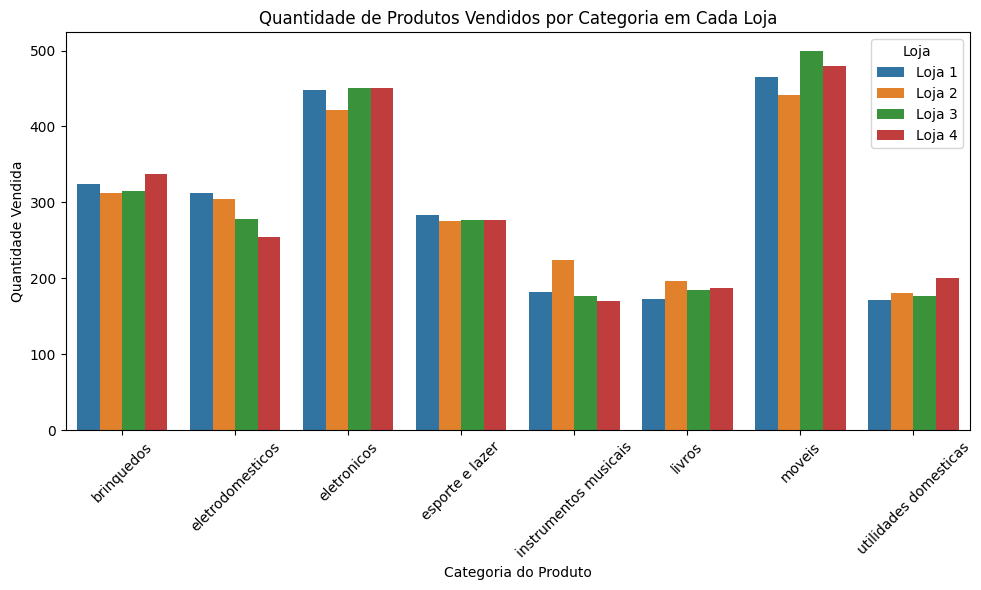

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Gráfico de barras por categoria e loja
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Categoria do Produto',
    y='Quantidade Vendida',
    hue='Loja',
    data=quantidade_por_categoria
)
plt.title('Quantidade de Produtos Vendidos por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

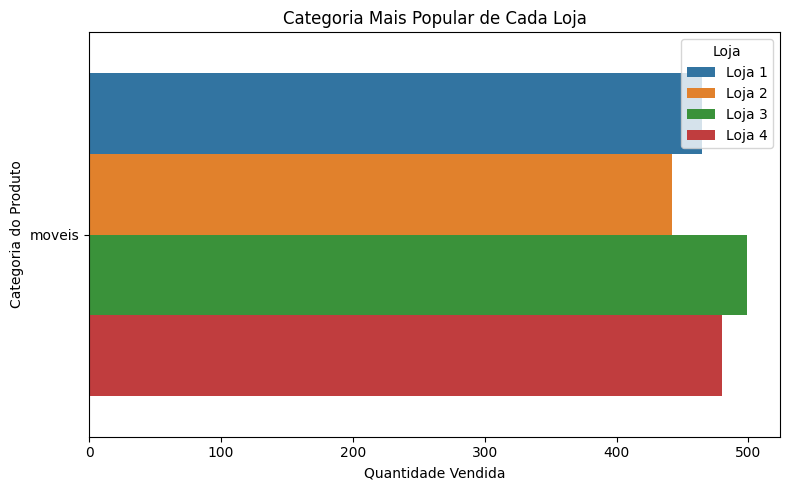

In [ ]:
#Gráfico de barras horizontal das categorias mais populares
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Quantidade Vendida',
    y='Categoria do Produto',
    hue='Loja',
    data=mais_popular_por_loja
)
plt.title('Categoria Mais Popular de Cada Loja')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria do Produto')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
#Média das avaliações por loja
media_avaliacao_por_loja = (
    df_combined
    .groupby('Loja')['Avaliação da compra']
    .mean()
    .reset_index()
)

print("Média de avaliação por loja:")
print(media_avaliacao_por_loja)

Média de avaliação por loja:
     Loja  Avaliação da compra
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


/tmp/ipython-input-1480629951.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


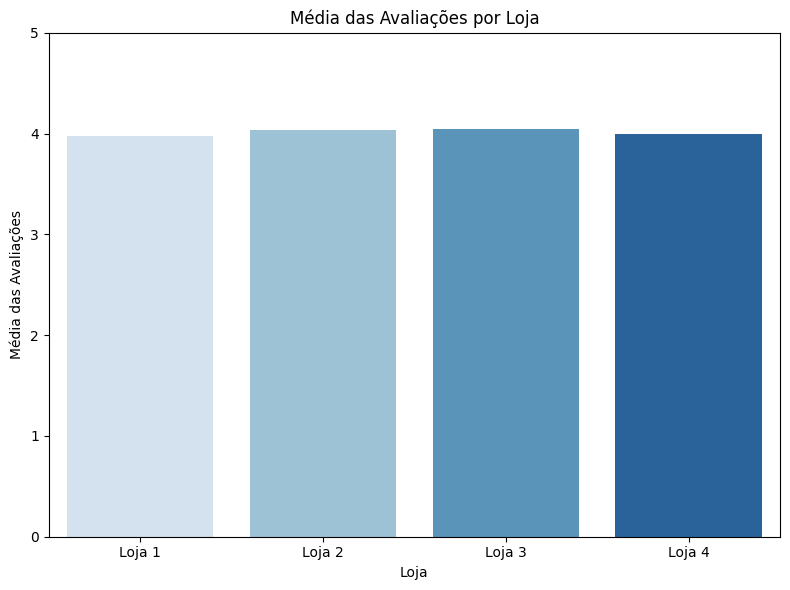

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Barras
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Loja',
    y='Avaliação da compra',
    data=media_avaliacao_por_loja,
    palette='Blues'
)
plt.title('Média das Avaliações por Loja')
plt.ylim(0, 5)  # escala de 0 a 5
plt.ylabel('Média das Avaliações')
plt.xlabel('Loja')
plt.tight_layout()
plt.show()


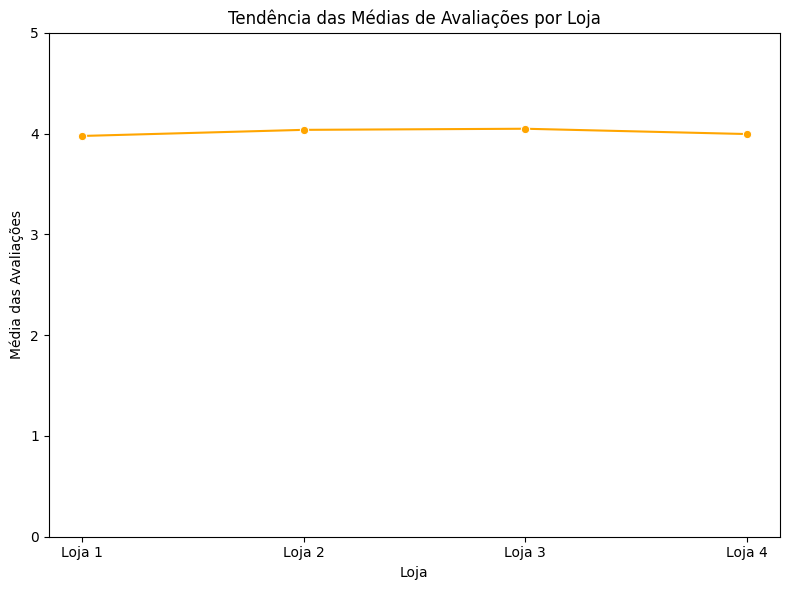

In [ ]:
# Gráfico de Linhas
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='Loja',
    y='Avaliação da compra',
    data=media_avaliacao_por_loja,
    marker='o',
    color='orange'
)
plt.title('Tendência das Médias de Avaliações por Loja')
plt.ylim(0, 5)
plt.ylabel('Média das Avaliações')
plt.xlabel('Loja')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Contagem de vendas por produto e loja
vendas_por_produto_loja = (
    df_combined
    .groupby(['Loja', 'Produto'])
    .size()
    .reset_index(name='Quantidade Vendida')
)

In [ ]:
# Produto mais vendido por loja
mais_vendidos = vendas_por_produto_loja.loc[
    vendas_por_produto_loja.groupby('Loja')['Quantidade Vendida'].idxmax()
]

# Produto menos vendido por loja
menos_vendidos = vendas_por_produto_loja.loc[
    vendas_por_produto_loja.groupby('Loja')['Quantidade Vendida'].idxmin()
]

In [45]:
print("Produtos mais vendidos por loja:")
print(mais_vendidos)
print("\nProdutos menos vendidos por loja:")
print(menos_vendidos)

Produtos mais vendidos por loja:
       Loja                   Produto  Quantidade Vendida
24   Loja 1             Guarda roupas                  60
79   Loja 2  Iniciando em programação                  65
134  Loja 3             Kit banquetas                  57
161  Loja 4                  Cama box                  62

Produtos menos vendidos por loja:
       Loja            Produto  Quantidade Vendida
11   Loja 1       Celular ABXY                  33
82   Loja 2  Jogo de tabuleiro                  32
105  Loja 3   Blocos de montar                  35
178  Loja 4           Guitarra                  33


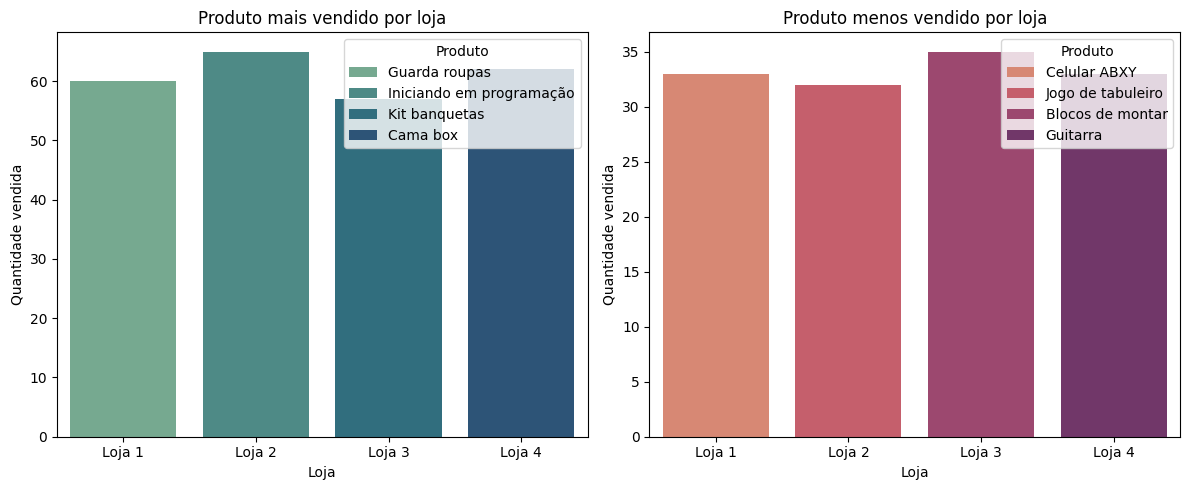

In [ ]:
# VISUALIZAÇÃO GRÁFICA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Gráfico de produtos mais vendidos
plt.subplot(1, 2, 1)
sns.barplot(data=mais_vendidos, x='Loja', y='Quantidade Vendida', hue='Produto', palette='crest')
plt.title("Produto mais vendido por loja")
plt.ylabel("Quantidade vendida")
plt.xlabel("Loja")

# Gráfico de produtos menos vendidos
plt.subplot(1, 2, 2)
sns.barplot(data=menos_vendidos, x='Loja', y='Quantidade Vendida', hue='Produto', palette='flare')
plt.title("Produto menos vendido por loja")
plt.ylabel("Quantidade vendida")
plt.xlabel("Loja")

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

1.   Item da lista
2.   Item da lista




In [ ]:
# Passo 5 - Custo médio de frete por loja
custo_medio_frete_por_loja = (
    df_combined
    .groupby('Loja')['Frete']
    .mean()
    .reset_index()
)

print("Custo médio de frete por loja:")
print(custo_medio_frete_por_loja)

Custo médio de frete por loja:
     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


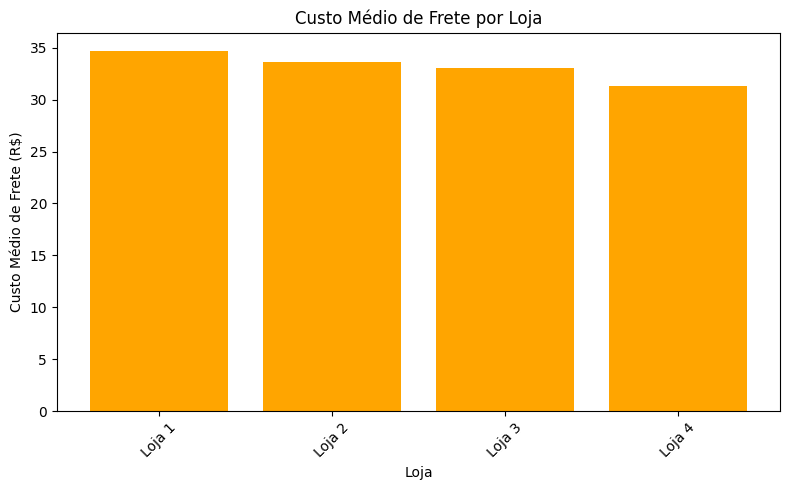

In [ ]:
# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(custo_medio_frete_por_loja['Loja'], custo_medio_frete_por_loja['Frete'], color='orange')
plt.xlabel('Loja')
plt.ylabel('Custo Médio de Frete (R$)')
plt.title('Custo Médio de Frete por Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


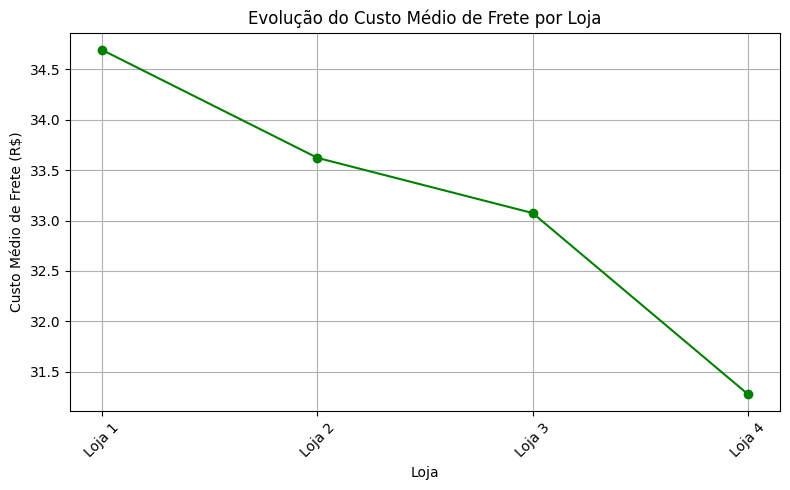

In [ ]:
# Gráfico de linha
plt.figure(figsize=(8,5))
plt.plot(custo_medio_frete_por_loja['Loja'], custo_medio_frete_por_loja['Frete'], marker='o', linestyle='-', color='green')
plt.xlabel('Loja')
plt.ylabel('Custo Médio de Frete (R$)')
plt.title('Evolução do Custo Médio de Frete por Loja')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Graficos




/tmp/ipython-input-565638334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Preço', data=faturamento_por_loja, palette='coolwarm')


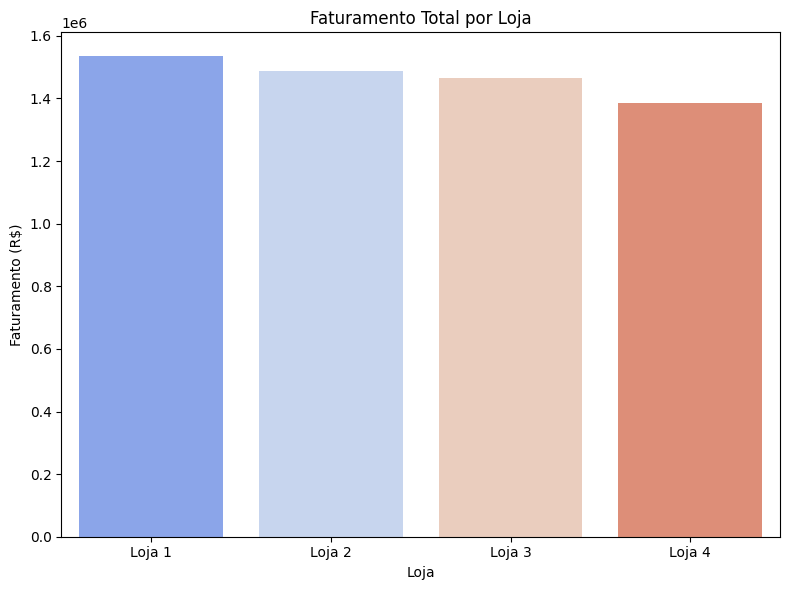

In [ ]:
#Gráfico de barras — Faturamento total por loja

plt.figure(figsize=(8,6))
sns.barplot(x='Loja', y='Preço', data=faturamento_por_loja, palette='coolwarm')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()
plt.show()

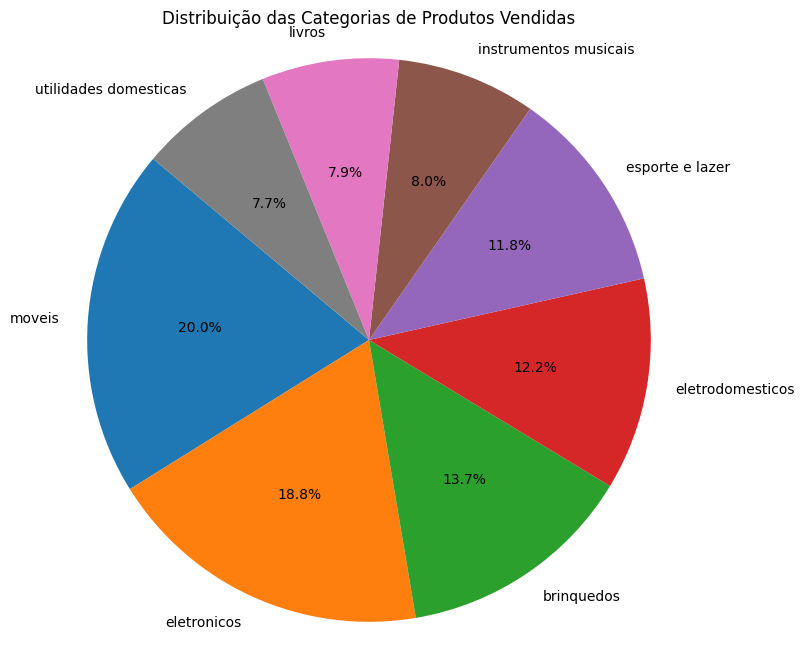

In [ ]:
#Gráfico de pizza — Distribuição percentual das categorias de produtos vendidas
total_por_categoria = df_combined['Categoria do Produto'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(total_por_categoria, labels=total_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias de Produtos Vendidas')
plt.axis('equal')
plt.show()

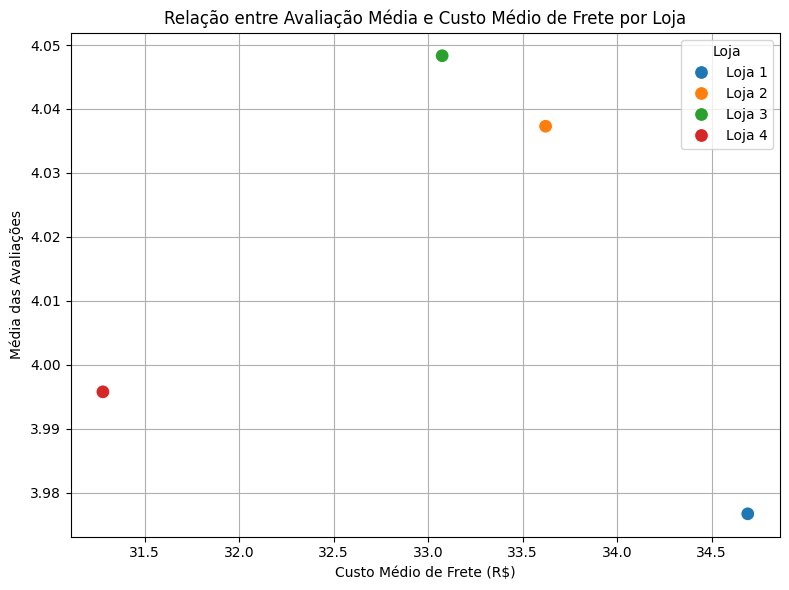

In [ ]:
#Gráfico de dispersão (scatter) — Relação entre avaliação média e custo médio de frete por loja

df_avaliacao_frete = pd.merge(media_avaliacao_por_loja, custo_medio_frete_por_loja, on='Loja')

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Frete',
    y='Avaliação da compra',
    data=df_avaliacao_frete,
    s=100,
    hue='Loja',
    palette='tab10'
)
plt.title('Relação entre Avaliação Média e Custo Médio de Frete por Loja')
plt.xlabel('Custo Médio de Frete (R$)')
plt.ylabel('Média das Avaliações')
plt.grid(True)
plt.tight_layout()
plt.show()

#7. Relatorio
  

# Relatório Final — Análise para Decisão de Foco e Desinvestimento nas Lojas

## Introdução

Este relatório sintetiza a análise realizada em quatro lojas, considerando faturamento, vendas por categoria e produto, avaliação dos clientes e custo médio de frete. O objetivo é indicar a loja na qual o Senhor João deve concentrar seus investimentos para maximizar resultados, bem como qual loja deve ser descontinuada para otimizar recursos.

## Análise Resumida

- **Faturamento:** A Loja 1 lidera com R$ 1.534.509,12, seguida pelas Lojas 2, 3 e 4, respectivamente.

- **Categorias mais vendidas:** A categoria “móveis” é a mais popular em todas as lojas, especialmente na Loja 3 com 499 unidades vendidas.

- **Avaliação dos clientes:** A Loja 3 apresenta a melhor média (4,05), seguida pela Loja 2 (4,04). A Loja 1 tem a menor média (3,98).

- **Produtos mais vendidos:** Cada loja tem um produto campeão, destacando-se “Guarda roupas” na Loja 1.

- **Custo médio de frete:** A Loja 4 tem o menor custo ( 31,28), enquanto a Loja 1 tem o maior ( 34,69)

## Recomendação

Com base nos dados, recomenda-se que o Senhor João **invista na Loja 1**, pois é a que gera o maior faturamento e possui forte presença nos produtos e categorias mais vendidos. Embora a avaliação média e o custo do frete não sejam os melhores, o potencial de receita e volume de vendas compensam esses pontos.

Como contraponto, recomenda-se que o Senhor João **se desfaça da Loja 4**, que apresenta o menor faturamento (R$ 1.384.497,58) apesar do frete mais barato, além de não se destacar em avaliação nem em produtos campeões, tornando-se menos competitiva.

Focar os recursos na Loja 1 permitirá maior retorno financeiro e oportunidades de melhorar aspectos como satisfação do cliente e eficiência logística.
